In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

# Importação dos dados
* Um CSV para cada campus
* data: de 2019-02-18 (segunda semana de aula) até 019-06-28 (penultima semana de aula)
* Granularidade: 1h (potência agregada pela média)
* Dados climáticos obtidos pela plataforma yr
* Colunas
  * potencia ativa da fase A (Kw)
  * Temperatura (ºC)
  * Pressão (hPa)


In [2]:
raw = pd.read_csv ('../../datasets/2019-1 Fpolis.csv', sep=',')

In [3]:
raw.describe()

,pa,temp_celsius,pressao
count,2990.000000,3145.000000,3145.000000
mean,59.906041,22.123370,1015.875167
std,61.195168,3.047656,4.550072
min,0.000000,13.000000,1003.000000
25%,23.698369,20.000000,1013.000000
50%,29.712298,22.000000,1015.700000
75%,88.263032,24.000000,1018.900000
max,1881.630715,34.000000,1028.100000


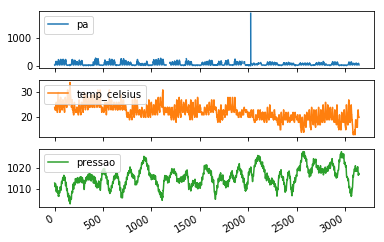

In [4]:
(ax1, ax2,ax3) = raw.plot(subplots=True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

Text(0.5, 0, 'Potência Ativa (KW)')

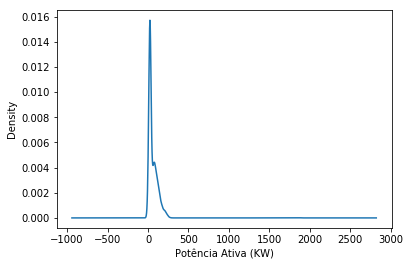

In [5]:
raw['pa'].plot.kde().set_xlabel("Potência Ativa (KW)")

Text(0.5, 0, 'Temperatura (ºC)')

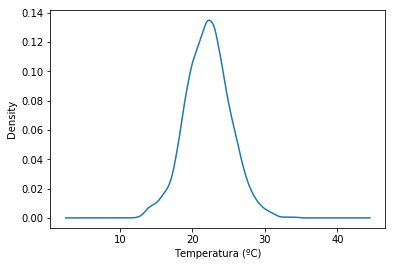

In [6]:
raw['temp_celsius'].plot.kde().set_xlabel("Temperatura (ºC)")

Text(0.5, 0, 'Pressão (hPa)')

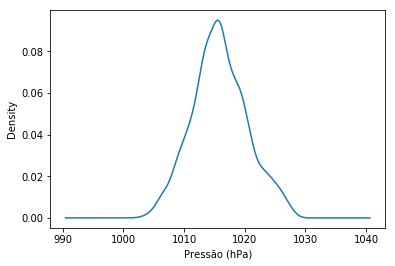

In [7]:
raw['pressao'].plot.kde().set_xlabel("Pressão (hPa)")

# Data cleaning
* Filtra horários de aula
* remover linhas incompletas (sistema fora do ar)
* remover oulier (falhas na coleta de dados).
* remover dias não-letivos
* remover dias com falhas na medição (sistema fora do ar)

In [8]:
processed = raw.dropna()
processed = processed.set_index(pd.to_datetime (processed['momento'])).drop('momento', axis=1)

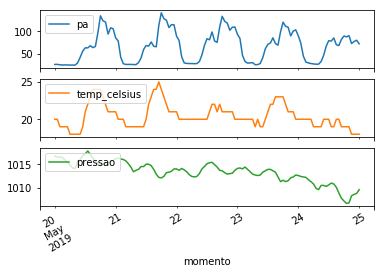

In [9]:

(ax1, ax2, ax3) = processed['2019-05-20 00:00:00' : '2019-05-25 00:00:00'].plot(subplots=True, sharex=True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
#ax1.legend(loc="upper right")



In [10]:
processed = processed[processed['pa']<500]

In [11]:
processed = processed[processed['pa']>10]

In [12]:
## Remove fins de semana
# Create an index of just the date portion of your index (this is the slow step)
dfDays = pd.to_datetime(processed.index.date)

# Create a range of business days over that period
dfBdays = pd.bdate_range(start=processed.index[0].date(), end=processed.index[-1].date())

#Filter the series to just those days contained in the business day range.
filtered = processed[dfDays.isin(dfBdays)]

In [13]:
## Removendo dias não-letivos ou com erros
# março
# abril 4, 8, 15, 16,17,18,19, 22, 25, 29
# maio 1, 9, 10, 14, 15, 16, 17
# junho 20, 21
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 4))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 8))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 15))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 16))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 17))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 18))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 19))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 22))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 25))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 29))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 1))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 9))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 10))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 14))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 15))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 16))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 17))]
filtered = filtered[~((filtered.index.month == 6) & (filtered.index.day == 20))]
filtered = filtered[~((filtered.index.month == 6) & (filtered.index.day == 21))]

In [14]:
# Selecionando horários de aula
filtered1 = filtered.between_time('08:00:00', '11:00:00')
filtered2 = filtered.between_time('14:00:00', '17:00:00')
filtered = pd.concat([filtered1, filtered2])

In [15]:
filtered = filtered[~((filtered['pa']<50) & (filtered['temp_celsius']>27))]

Text(0, 0.5, 'Potência ativa (KW)')

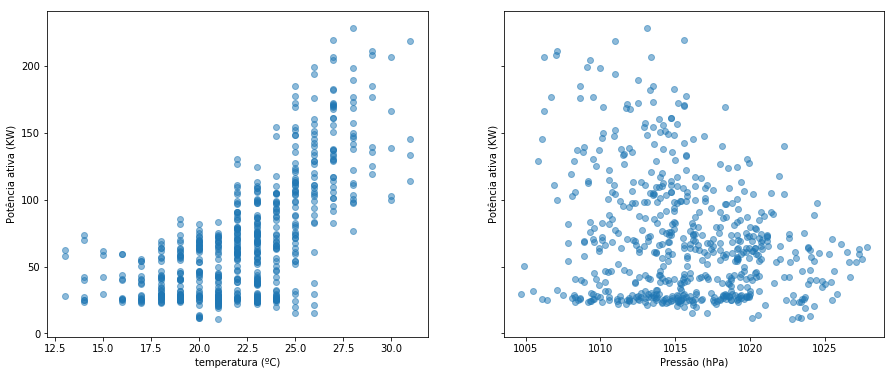

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,6))
ax1.scatter(filtered['temp_celsius'], filtered['pa'], Alpha=0.5)
ax1.set_xlabel("temperatura (ºC)")
ax1.set_ylabel("Potência ativa (KW)")
ax2.scatter(filtered['pressao'], filtered['pa'], Alpha=0.5)
ax2.set_xlabel("Pressão (hPa)")
ax2.set_ylabel("Potência ativa (KW)")

In [17]:
filtered.describe()

,pa,temp_celsius,pressao
count,591.000000,591.000000,591.000000
mean,70.454946,22.311337,1015.737394
std,45.053082,3.404064,4.576636
min,10.796332,13.000000,1004.700000
25%,30.261092,20.000000,1012.600000
50%,61.460348,22.000000,1015.500000
75%,97.355298,25.000000,1019.100000
max,228.153384,31.000000,1027.800000


In [20]:
filtered['id']=1
filtered

,pa,temp_celsius,pressao,id
momento,,,,
2019-02-18 08:00:00,21.777492,23,1011.2,1
2019-02-18 09:00:00,24.797172,23,1011.9,1
2019-02-18 10:00:00,37.459482,23,1012.3,1
2019-02-18 11:00:00,63.432638,23,1012.6,1
2019-02-19 08:00:00,25.952269,22,1008.6,1
2019-02-19 09:00:00,27.452049,22,1008.3,1
2019-02-19 10:00:00,38.428279,23,1008.9,1
2019-02-19 11:00:00,76.208217,25,1009.3,1
2019-02-20 08:00:00,23.823914,23,1008.3,1


In [18]:
# Cross validation split
from sklearn.model_selection import train_test_split 
X = filtered.drop('pa', axis=1)
y = filtered ['pa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

In [30]:
X_test

,temp_celsius,pressao
momento,,
2019-06-18 11:00:00,19,1020.8
2019-02-22 08:00:00,23,1014.5
2019-06-28 09:00:00,16,1019.4
2019-06-06 14:00:00,21,1023.9
2019-02-27 08:00:00,23,1013.4
2019-02-18 10:00:00,23,1012.3
2019-05-29 14:00:00,22,1018.0
2019-05-08 15:00:00,22,1021.5
2019-04-11 15:00:00,26,1016.1


In [31]:
y_test

momento
2019-06-18 11:00:00     63.383921
2019-02-22 08:00:00     23.873081
2019-06-28 09:00:00     26.696909
2019-06-06 14:00:00     64.643567
2019-02-27 08:00:00     27.370911
2019-02-18 10:00:00     37.459482
2019-05-29 14:00:00     62.246945
2019-05-08 15:00:00     89.256060
2019-04-11 15:00:00     82.436966
2019-06-24 09:00:00     26.162043
2019-05-21 08:00:00     24.976095
2019-02-18 11:00:00     63.432638
2019-06-19 17:00:00    105.767357
2019-04-01 14:00:00    147.573298
2019-05-13 08:00:00     25.703634
2019-06-27 16:00:00     61.168470
2019-03-20 14:00:00    154.119315
2019-03-08 11:00:00    135.764134
2019-06-14 08:00:00     27.942741
2019-05-07 15:00:00     97.330802
2019-03-14 16:00:00    126.497236
2019-05-31 08:00:00     25.364428
2019-03-28 10:00:00     18.873023
2019-04-12 16:00:00    103.654686
2019-03-19 17:00:00    204.759026
2019-06-12 14:00:00     69.870861
2019-04-09 15:00:00     60.859397
2019-05-07 17:00:00    126.562417
2019-05-08 16:00:00     84.577985
2019-0

# Linear Regression

In [19]:
model1 = LinearRegression()
model1.fit (X_train, y_train)
pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient'])

,Coefficient
temp_celsius,9.503799
pressao,0.299056


MAE:                 26.97950688636858
RMSE:                34.29523555329796
Percentual:          38.47309204975011 %


Text(0, 0.5, 'Valores previstos')

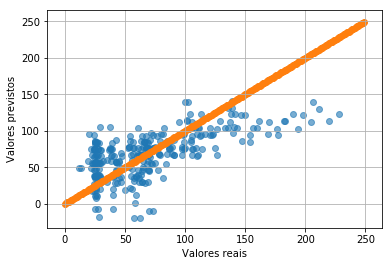

In [20]:
from sklearn import metrics
y_hat1 = model1.predict(X_test)

print ("MAE:                ", metrics.mean_absolute_error(y_test, y_hat1))
print ("RMSE:               ", np.sqrt(metrics.mean_squared_error(y_test, y_hat1)))
print ("Percentual:         ", metrics.mean_absolute_error(y_test,y_hat1)/y_test.mean()*100, "%")

# Previsto vs real
line = np.arange(0, 250, 1)

plt.scatter(y_test,y_hat1, Alpha=0.6)
plt.scatter(line,line)
plt.grid(True)
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")

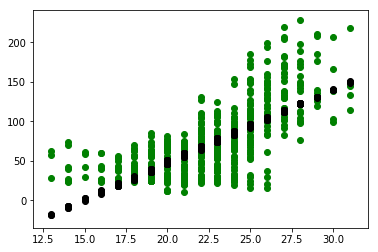

In [21]:
plt.scatter(X['temp_celsius'], y,color='g')
plt.scatter(X['temp_celsius'], model1.predict(X),color='k')

plt.show()

# Random Forest

In [22]:
import sklearn.metrics as metrics
import math
from sklearn.ensemble import RandomForestRegressor

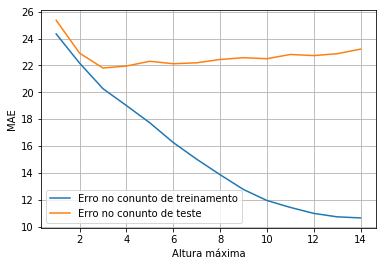

In [25]:
mae1 = {}
mae2 = {}
for k in range(1,15, 1):
    model2 = RandomForestRegressor(max_depth=k, n_estimators=100, criterion='mae').fit(X_train,y_train)
    y_hat = model2.predict(X_train)
    mae1[k] = metrics.mean_absolute_error(y_train,y_hat)
    y_hat = model2.predict(X_test)
    mae2[k] = metrics.mean_absolute_error(y_test,y_hat)

plt.figure()
plt.plot(list(mae1.keys()), list(mae1.values()), label='Erro no conunto de treinamento')
plt.plot(list(mae2.keys()), list(mae2.values()), label='Erro no conunto de teste')
plt.legend(loc='lower left')
plt.xlabel("Altura máxima")
plt.ylabel("MAE")
plt.grid(True)

In [26]:
# Random Forest
model2 = RandomForestRegressor(max_depth=3, n_estimators=100)
model2.fit(X_train,y_train)

# Model Evaluation
y_hat2 = model2.predict(X_test)

print ("MAE:                ", metrics.mean_absolute_error(y_test,y_hat2))
print ("RMSE:               ", math.sqrt(metrics.mean_squared_error(y_test,y_hat2)))
print ("Percentual:         ", metrics.mean_absolute_error(y_test,y_hat2)/y_test.mean()*100, "%")

# Feature analysis
print ("=====================================")
print ("FEATURE IMPORTANCE:")
for i in range(model2.feature_importances_.size):
    print (X_train.columns[i], "=", model2.feature_importances_[i])

MAE:                 22.09663368502784
RMSE:                29.054007622458546
Percentual:          31.51005781292511 %
FEATURE IMPORTANCE:
temp_celsius = 0.8680984607970913
pressao = 0.13190153920290898


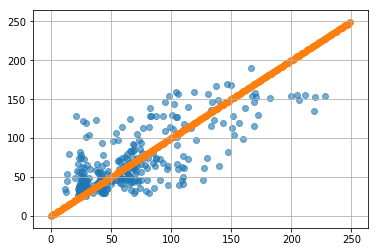

In [71]:
# Previsto vs real
line = np.arange(0, 250, 1)

plt.scatter(y_test,y_hat, Alpha=0.6)
plt.scatter(line,line)
plt.grid(True)

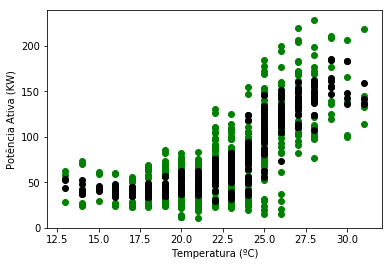

In [72]:
plt.scatter(X['temp_celsius'], y,color='g')
plt.scatter(X['temp_celsius'], model2.predict(X),color='k')
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Potência Ativa (KW)")
plt.show()

In [28]:
import pickle
with open('fpolis_trained_model.pkl', 'wb') as f:
    pickle.dump(model2, f)
with open('fpolis_trained_model.pkl', 'rb') as f:
    model2_loaded = pickle.load(f)
model2_loaded

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)